In [284]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="darkgrid")

# Introdução

In [285]:
# Lendo DF em relação ao mês de Julho
comb_jul = pd.read_csv('dados/precos-gasolina-etanol-07.csv', delimiter=';')
comb_jul.head(1)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA


In [286]:
# Lendo DF em relação ao mês de Agosto
comb_ago = pd.read_csv('dados/precos-gasolina-etanol-08.csv', delimiter=';')
comb_ago.head(1)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,ETANOL,01/08/2022,"4,79",NaN,R$ / litro,VIBRA ENERGIA


In [287]:
# Concatenando os dois DF's
conjunto_dados = pd.concat([comb_jul, comb_ago])
conjunto_dados.head(1)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA


# Análise Exploratória

In [288]:
# Shape
conjunto_dados.shape

(127176, 16)

In [289]:
# Dicionario das colunas

In [290]:
conjunto_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127176 entries, 0 to 69543
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     127176 non-null  object 
 1   Estado - Sigla     127176 non-null  object 
 2   Municipio          127176 non-null  object 
 3   Revenda            127176 non-null  object 
 4   CNPJ da Revenda    127176 non-null  object 
 5   Nome da Rua        127176 non-null  object 
 6   Numero Rua         127105 non-null  object 
 7   Complemento        27079 non-null   object 
 8   Bairro             126764 non-null  object 
 9   Cep                127176 non-null  object 
 10  Produto            127176 non-null  object 
 11  Data da Coleta     127176 non-null  object 
 12  Valor de Venda     127176 non-null  object 
 13  Valor de Compra    0 non-null       float64
 14  Unidade de Medida  127176 non-null  object 
 15  Bandeira           127176 non-null  object 
dtypes: 

In [291]:
# Checando a % de valores nulos em cada coluna do DF
((conjunto_dados.isnull().sum() / conjunto_dados.shape[0]) * 100).sort_values(ascending=False)

Valor de Compra      100.000000
Complemento           78.707461
Bairro                 0.323960
Numero Rua             0.055828
Regiao - Sigla         0.000000
Estado - Sigla         0.000000
Municipio              0.000000
Revenda                0.000000
CNPJ da Revenda        0.000000
Nome da Rua            0.000000
Cep                    0.000000
Produto                0.000000
Data da Coleta         0.000000
Valor de Venda         0.000000
Unidade de Medida      0.000000
Bandeira               0.000000
dtype: float64

In [292]:
# Dtype
conjunto_dados.dtypes

Regiao - Sigla        object
Estado - Sigla        object
Municipio             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Numero Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda        object
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

## Tratamento

In [293]:
# Resetando Index no DF concatenado
conjunto_dados.reset_index(0, drop=True, inplace=True)

In [294]:
# Dropando a coluna 'Valor de Compra' pois a mesma contém apenas valores nulos
conjunto_dados.drop('Valor de Compra', axis=1, inplace=True)

In [295]:
# Transformando os valores da coluna 'Valor de Venda' para float
conjunto_dados['Valor de Venda'] = conjunto_dados['Valor de Venda'].apply(lambda y: float(str(y.replace(',','.'))))

In [296]:
# Preenchendo valores nulos da coluna 'Complemento' com 0
conjunto_dados.Complemento.fillna('0', inplace=True)

In [297]:
# Trasnformando as datas da coluna 'Data da Coleta' para datetime
conjunto_dados['Data da Coleta'] = pd.to_datetime(conjunto_dados['Data da Coleta'], format='%d/%m/%Y')
conjunto_dados.head(1)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,0,LACE,29703-030,GASOLINA ADITIVADA,2022-07-01,7.48,R$ / litro,VIBRA ENERGIA


- Funções

In [298]:
# Passando strings para minusculas no DF
to_title = lambda x: x.title() if isinstance(x, str) else x

In [299]:
# Criando função que acrecenta coluna de dias da semana
def cria_semanas(df):
    dias_semana = {'Sunday':'Domingo', 'Monday':'Segunda', 'Tuesday':'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado'}
    df['Dias da Semana'] = df['Data da Coleta'].apply(lambda x: x.strftime('%A'))
    df['Dias da Semana'] = df['Dias da Semana'].replace(dias_semana)
    return df

In [300]:
# Aplicando a função no DF
conjunto_dados = cria_semanas(conjunto_dados)

In [301]:
# Passando strings para minusculas no DF
conjunto_dados['Municipio'] = conjunto_dados['Municipio'].apply(to_title)
conjunto_dados['Revenda'] = conjunto_dados['Revenda'].apply(to_title)
conjunto_dados['Nome da Rua'] = conjunto_dados['Nome da Rua'].apply(to_title)
conjunto_dados['Complemento'] = conjunto_dados['Complemento'].apply(to_title)
conjunto_dados['Bairro'] = conjunto_dados['Bairro'].apply(to_title)
conjunto_dados['Produto'] = conjunto_dados['Produto'].apply(to_title)
conjunto_dados['Bandeira'] = conjunto_dados['Bandeira'].apply(to_title)

In [302]:
conjunto_dados.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira,Dias da Semana
0,SE,ES,Colatina,Sao Francisco De Assis Comercio De Combustivei...,08.519.545/0001-10,Praca Fidelis Ferrari,35,0,Lace,29703-030,Gasolina Aditivada,2022-07-01,7.48,R$ / litro,Vibra Energia,Sexta
1,SE,ES,Colatina,Sao Francisco De Assis Comercio De Combustivei...,08.519.545/0001-10,Praca Fidelis Ferrari,35,0,Lace,29703-030,Gasolina,2022-07-01,7.38,R$ / litro,Vibra Energia,Sexta
2,SE,ES,Colatina,Posto Motocap Ltda,04.814.652/0001-10,Praca Almirante Barroso,52,Letra A,Lace,29703-055,Etanol,2022-07-01,5.99,R$ / litro,Vibra Energia,Sexta
3,SE,ES,Colatina,Posto Motocap Ltda,04.814.652/0001-10,Praca Almirante Barroso,52,Letra A,Lace,29703-055,Gasolina,2022-07-01,7.39,R$ / litro,Vibra Energia,Sexta
4,CO,GO,Goiania,Justiniano & Justiniano Ltda,04.489.287/0001-16,Avenida Jose Leandro Da Cruz,"2,36","Quadra 18, Lote 01",Parque Amazonia,74840-390,Gasolina Aditivada,2022-07-01,6.49,R$ / litro,Ipiranga,Sexta


In [303]:
conjunto_dados.describe()

,Valor de Venda
count,127176.000000
mean,5.355503
std,0.860449
min,2.890000
25%,4.880000
50%,5.490000
75%,5.890000
max,9.270000


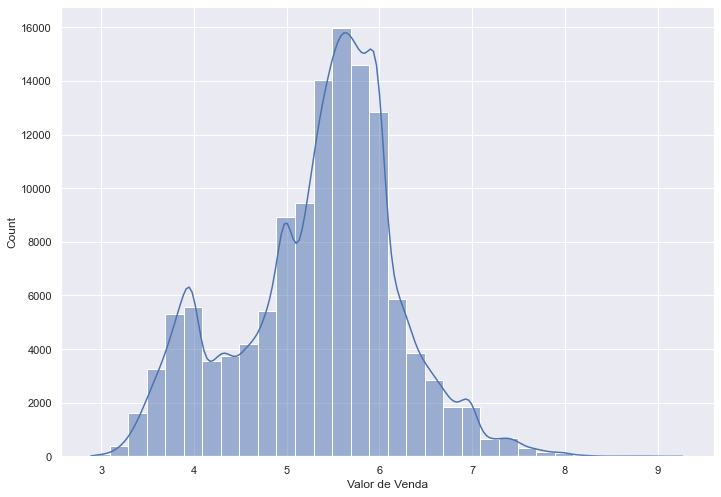

In [304]:
sns.histplot(data=conjunto_dados['Valor de Venda'], kde=True, binwidth=0.2)
plt.show()

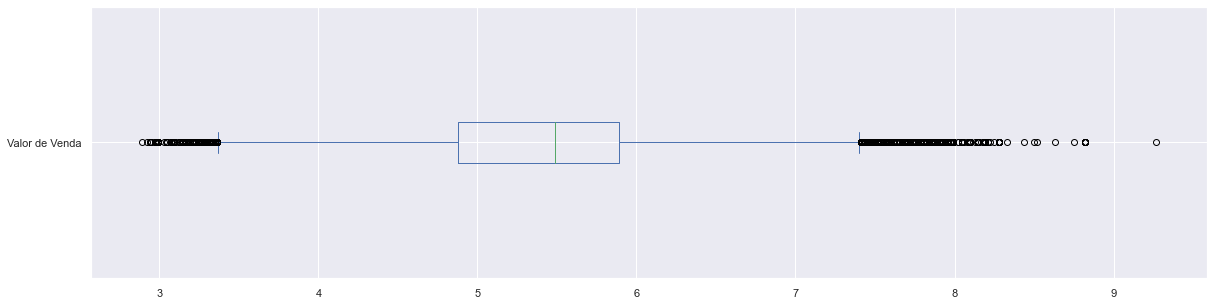

In [305]:
conjunto_dados['Valor de Venda'].plot(kind='box', vert=False, figsize=(20, 5))
plt.show()

## Trabalhando nos dados

In [306]:
#1 Como se comportam o preço dos combustíveis durante os dois meses citados? (Jul/Ago) Os valores do etanol e da gasolina tiveram uma (tendencia?) de queda ou diminuição?

In [307]:
comb_jul = conjunto_dados[(conjunto_dados['Data da Coleta'] < '2022-08-01')] 
comb_ago = conjunto_dados[(conjunto_dados['Data da Coleta'] > '2022-08-01')]

In [308]:
# Criando DF's dos preços de combustíveis para julho e agosto
preco_comb_jul = comb_jul.groupby(['Regiao - Sigla']).mean()
preco_comb_jul.columns = ['Preço Médio']

preco_comb_ago = comb_ago.groupby(['Regiao - Sigla']).mean()
preco_comb_ago.columns = ['Preço Médio']

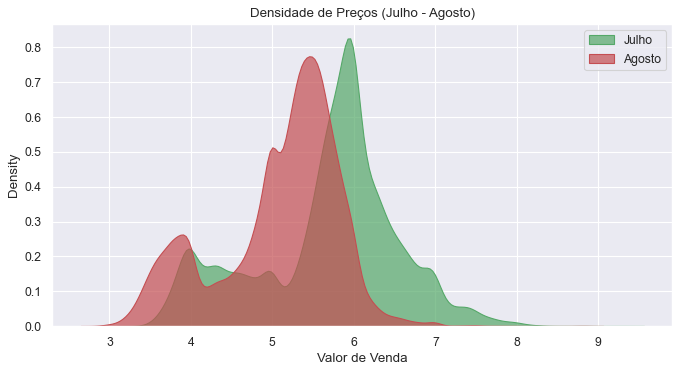

In [309]:
plt.figure(figsize=(10, 5), dpi=80)

sns.kdeplot(comb_jul['Valor de Venda'], shade=True, color='g', label='Julho', alpha=.7)
sns.kdeplot(comb_ago['Valor de Venda'], shade=True, color='r', label='Agosto', alpha=.7)

plt.title('Densidade de Preços (Julho - Agosto)', fontsize=12)
plt.legend()
plt.show()

In [310]:
display(preco_comb_jul.sort_values(by='Preço Médio', ascending=True))

display(preco_comb_ago.sort_values(by='Preço Médio', ascending=True))

,Preço Médio
Regiao - Sigla,
CO,5.326755
SE,5.408082
S,5.775341
NE,6.206380
N,6.213738


,Preço Médio
Regiao - Sigla,
CO,4.803764
SE,4.890828
S,5.224502
NE,5.369108
N,5.594068


In [311]:
# 2. Qual o preço médio da gasolina e do etanol nesses dois meses?

In [312]:
relacao_comb_preco_jul = comb_jul[['Produto','Valor de Venda', 'Regiao - Sigla']].groupby(['Produto', 'Regiao - Sigla']).mean()
relacao_comb_preco_jul.columns = ['Preço Médio']
relacao_comb_preco_jul.sort_values(by='Produto', ascending=True,inplace = True)

novo = relacao_comb_preco_jul.unstack().copy().T
novo_etanol = novo['Etanol']
novo_gas = novo['Gasolina']
novo_gasadt = novo['Gasolina Aditivada']

relacao_comb_preco_jul = pd.DataFrame([novo_etanol,novo_gas,novo_gasadt])
relacao_comb_preco_jul = relacao_comb_preco_jul['Preço Médio'].T

display(relacao_comb_preco_jul)

,Etanol,Gasolina,Gasolina Aditivada
Regiao - Sigla,,,
CO,4.324710,5.894329,6.034480
N,5.637043,6.322346,6.457643
NE,5.605162,6.443064,6.600561
S,5.104525,5.939016,6.079456
SE,4.364011,5.926829,6.140690


In [313]:
relacao_comb_preco_ago = comb_ago[['Produto','Valor de Venda', 'Regiao - Sigla']].groupby(['Produto', 'Regiao - Sigla']).mean()
relacao_comb_preco_ago.columns = ['Preço Médio']

relacao_comb_preco_ago.sort_values(by='Produto', ascending=True, inplace = True)

novo = relacao_comb_preco_ago.unstack().copy().T
novo_etanol = novo['Etanol']
novo_gas = novo['Gasolina']
novo_gasadt = novo['Gasolina Aditivada']

relacao_comb_preco_ago = pd.DataFrame([novo_etanol,novo_gas,novo_gasadt])
relacao_comb_preco_ago = relacao_comb_preco_ago['Preço Médio'].T

display(relacao_comb_preco_ago)

,Etanol,Gasolina,Gasolina Aditivada
Regiao - Sigla,,,
CO,3.912062,5.301479,5.445814
N,5.098039,5.680932,5.808880
NE,4.925200,5.528224,5.681207
S,4.612057,5.373290,5.505014
SE,3.964701,5.343207,5.551107


In [314]:
# 3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

# Levando em consideração os 2 meses e os 2 combustíveis juntos,Gasolina(comum/aditiva) e Etanol.
dados_agrupados_estado = conjunto_dados.copy()

media_combs_estados = dados_agrupados_estado.groupby(dados_agrupados_estado['Estado - Sigla'])[['Valor de Venda']].mean()
media_combs_estados.columns = ['Preço Médio']

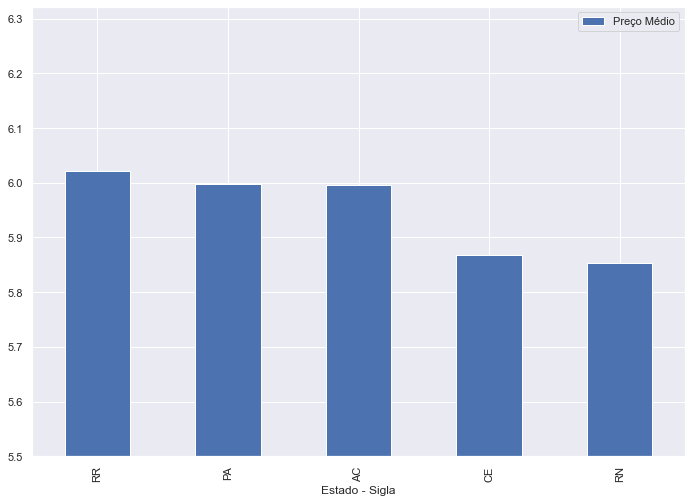

In [315]:
media_combs_estados.sort_values(by='Preço Médio', ascending=False).head().plot(kind='bar', ylim=5.5);

In [316]:
print('OS 5 ESTADOS COM O MAIOR PREÇO MÉDIO DE GASOLINA COMUM/ADITIVADA E ETANOL NO BIMESTRE.')
display(media_combs_estados.sort_values(by='Preço Médio', ascending=False).head())

OS 5 ESTADOS COM O MAIOR PREÇO MÉDIO DE GASOLINA COMUM/ADITIVADA E ETANOL NO BIMESTRE.


,Preço Médio
Estado - Sigla,
RR,6.020909
PA,5.998639
AC,5.996797
CE,5.867937
RN,5.852482


In [317]:
# Fazendo a média bimestral com a Gasolina, Gasolina Aditivada e o Etanol separados.

# GAS ADITIVADA
media_gas_adt_estado = dados_agrupados_estado.loc[dados_agrupados_estado['Produto'] == 'Gasolina Aditivada'].groupby(dados_agrupados_estado['Estado - Sigla'])

df_media_gas_adt_estado = media_gas_adt_estado[['Valor de Venda']].mean()
df_media_gas_adt_estado.columns = ['Preço Médio']

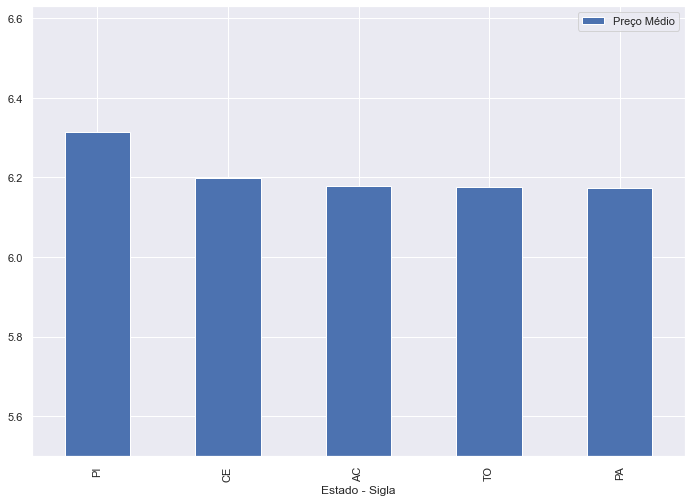

In [318]:
df_media_gas_adt_estado.sort_values(by='Preço Médio', ascending=False).head().plot(kind='bar', ylim=5.5);

In [319]:
print('OS 5 ESTADOS COM O MAIOR PREÇO MÉDIO DE GASOLINA ADITIVADA NO BIMESTRE.')
display(df_media_gas_adt_estado.sort_values(by='Preço Médio', ascending=False).head())

OS 5 ESTADOS COM O MAIOR PREÇO MÉDIO DE GASOLINA ADITIVADA NO BIMESTRE.


,Preço Médio
Estado - Sigla,
PI,6.314518
CE,6.197571
AC,6.177801
TO,6.176667
PA,6.174368


In [320]:
# GASOLINA

media_gas_estado = dados_agrupados_estado.loc[dados_agrupados_estado['Produto'] == 'Gasolina'].groupby(dados_agrupados_estado['Estado - Sigla'])
df_media_gas_estado = media_gas_estado[['Valor de Venda']].mean()
df_media_gas_estado.columns = ['Preço Médio']

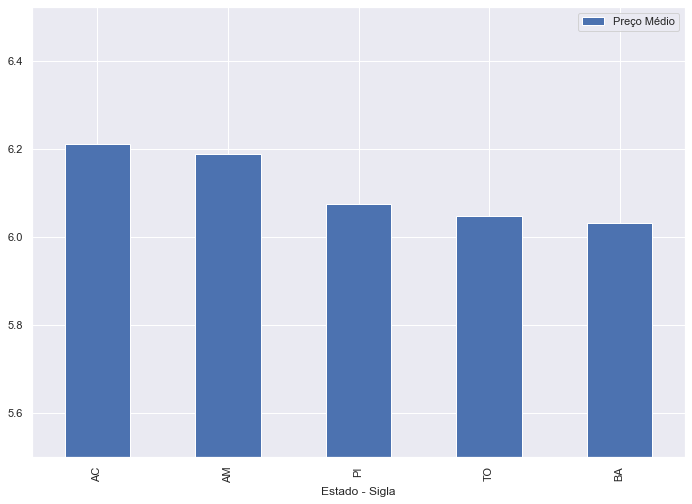

In [321]:
df_media_gas_estado.sort_values(by='Preço Médio', ascending=False).head().plot(kind='bar', ylim=5.5);

In [322]:
print('OS 5 ESTADOS COM O MAIOR PREÇO MÉDIO DE GASOLINA COMUM NO BIMESTRE.')
display(df_media_gas_estado.sort_values(by='Preço Médio', ascending=False).head())

OS 5 ESTADOS COM O MAIOR PREÇO MÉDIO DE GASOLINA COMUM NO BIMESTRE.


,Preço Médio
Estado - Sigla,
AC,6.211454
AM,6.188049
PI,6.075050
TO,6.046250
BA,6.030862


In [323]:
# ETANOL

media_etanol_estado = dados_agrupados_estado.loc[dados_agrupados_estado['Produto'] == 'Etanol'].groupby(dados_agrupados_estado['Estado - Sigla'])
df_media_etanol_estado = media_etanol_estado[['Valor de Venda']].mean()
df_media_etanol_estado.columns = ['Preço Médio']

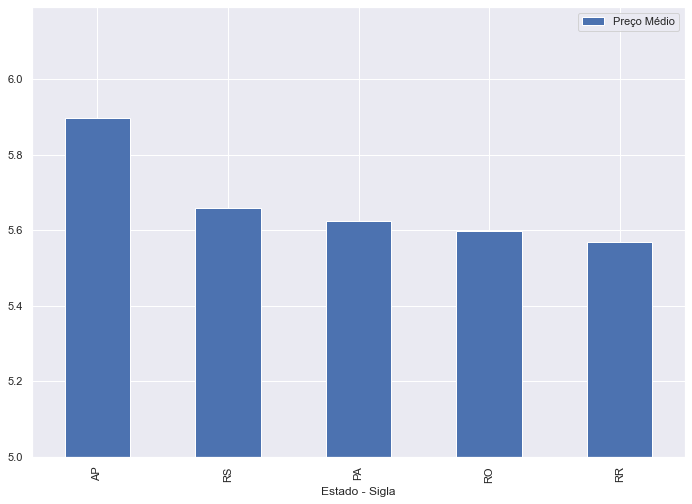

In [324]:
df_media_etanol_estado.sort_values(by='Preço Médio', ascending=False).head().plot(kind='bar', ylim=5.0);

In [325]:
print('OS 5 ESTADOS COM O MAIOR PREÇO MÉDIO DE ETANOL NO BIMESTRE.')
display(df_media_etanol_estado.sort_values(by='Preço Médio', ascending=False).head())

OS 5 ESTADOS COM O MAIOR PREÇO MÉDIO DE ETANOL NO BIMESTRE.


,Preço Médio
Estado - Sigla,
AP,5.896250
RS,5.660152
PA,5.624816
RO,5.599120
RR,5.568182


In [326]:
# 4. Qual o preço médio da gasolina e do etanol por estado?

# Fazendo a média bimestral da Gasolina,da Gasolina Aditivada e do Etanol.
df_media_comb_estado = pd.concat([df_media_gas_adt_estado, df_media_gas_estado, df_media_etanol_estado], axis=1)
df_media_comb_estado.columns = ['Gasolina Aditivada','Gasolina Comum','Etanol']

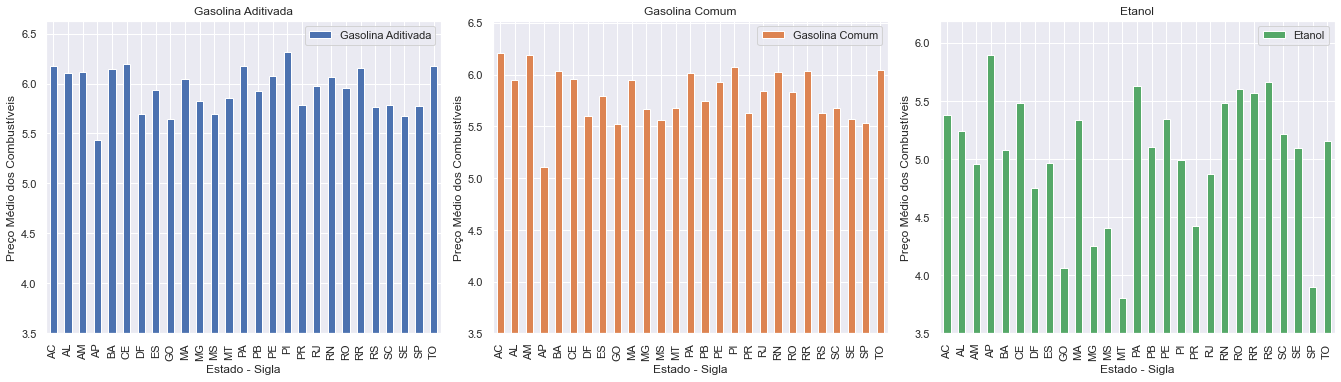

In [327]:
df_media_comb_estado.plot(kind='bar', figsize=(25,10), subplots=True, layout=(2,4) , ylim = 3.5, ylabel = 'Preço Médio dos Combustíveis')
plt.tight_layout()

In [328]:
print('Tabela com a média dos combustíveis por estado:\n')

df_media_comb_estado.style.highlight_max(color='#CF0909', axis=0).highlight_min(color='#0C9E02')

Tabela com a média dos combustíveis por estado:



,Gasolina Aditivada,Gasolina Comum,Etanol
Estado - Sigla,,,
AC,6.177801,6.211454,5.376684
AL,6.101433,5.944651,5.240854
AM,6.117741,6.188049,4.952985
AP,5.433056,5.107056,5.896250
BA,6.140488,6.030862,5.074360
CE,6.197571,5.955275,5.482219
DF,5.699895,5.600662,4.749265
ES,5.931265,5.796058,4.963646
GO,5.648403,5.518703,4.060479


In [329]:
# 5-Qual o município que possui o menor preço para a gasolina e para o etanol?

# primeiro, criamos um dataframe novo agrupando os dados de Produto e Municipio
produto_municipio = conjunto_dados.groupby(["Produto", "Estado - Sigla", 'Municipio'])

In [330]:
# Em seguida, extraimos apenas os valores mínimos, de acordo com a pergunta
min_municipio = produto_municipio[['Valor de Venda']].min()

# Criamos um dataframe contendo apenas os dados que retornavam as querys contendo Etanol, classificamos pelos valor de venda e resetamos o index na primeira linha
min_municipio_etanol = min_municipio.query("Produto == 'Etanol'").sort_values(by='Valor de Venda').head(1)

# Criamos um dataframe contendo apenas os dados que retornavam as querys contendo Gasolina, classificamos pelos valor de venda e resetamos o index na primeira linha
min_municipio_gas = min_municipio.query("Produto == 'Gasolina'").sort_values(by='Valor de Venda').head(1)

# Criamos um dataframe contendo apenas os dados que retornavam as querys contendo Gasolina Aditivada, classificamos pelos valor de venda e resetamos o index na primeira linha
min_municipio_gas_adi = min_municipio.query("Produto == 'Gasolina Aditivada'").sort_values(by='Valor de Venda').head(1)

# Concatenamos os três arquivos
minimas = pd.concat([min_municipio_etanol, min_municipio_gas, min_municipio_gas_adi])
minimas.columns = ['Menor Preço']

minimas

,,,Menor Preço
Produto,Estado - Sigla,Municipio,
Etanol,SP,Presidente Prudente,2.89
Gasolina,RS,Passo Fundo,4.13
Gasolina Aditivada,RS,Passo Fundo,4.13


In [331]:
# 6-Qual o município que possui o maior preço para a gasolina e para o etanol?

# extraimos apenas os valores máximos, de acordo com a pergunta
max_municipio = produto_municipio[['Valor de Venda']].max()

# Criamos um dataframe contendo apenas os dados que retornavam as querys contendo Etanol, classificamos pelos valor de venda e resetamos o index na primeira linha
max_municipio_etanol = min_municipio.query("Produto == 'Etanol'").sort_values(by='Valor de Venda', ascending=False).head(1)

# Criamos um dataframe contendo apenas os dados que retornavam as querys contendo Gasolina, classificamos pelos valor de venda e resetamos o index na primeira linha
max_municipio_gas = max_municipio.query("Produto == 'Gasolina'").sort_values(by='Valor de Venda', ascending=False).head(1)

# Criamos um dataframe contendo apenas os dados que retornavam as querys contendo Gasolina Aditivada, classificamos pelos valor de venda e resetamos o index na primeira linha
max_municipio_gas_adi = max_municipio.query("Produto == 'Gasolina Aditivada'").sort_values(by='Valor de Venda', ascending=False).head(1)

# Concatenamos os três arquivos
maximas = pd.concat([max_municipio_etanol, max_municipio_gas, max_municipio_gas_adi])
maximas.columns = ['Maior Preço']

maximas

,,,Maior Preço
Produto,Estado - Sigla,Municipio,
Etanol,RS,Uruguaiana,6.19
Gasolina,TO,Gurupi,8.75
Gasolina Aditivada,RJ,Mage,9.27


In [332]:
# 7. Qual a região que possui o maior valor médio da gasolina?

# Criando uma cópia do DF original onde temos apenas os registros da Gasolina
df_gas = conjunto_dados.query('Produto == "Gasolina"').copy()

# Ordenando o novo dataframe com o valor de venda da gasolina por região
produtos_gas = df_gas.groupby(['Produto', 'Regiao - Sigla'])[['Valor de Venda']].mean()
produtos_gas.columns = ['Maior Valor Médio']

novo = produtos_gas.unstack(level = 0).copy()
novo_gas = novo['Maior Valor Médio']['Gasolina']

produtos_gas= pd.DataFrame([novo_gas])
produtos_gas = produtos_gas.T
produtos_gas = produtos_gas.rename(columns={'Gasolina':'Maior Valor Médio - Gasolina'})

produtos_gas.style.highlight_max(color='#CF0909')

,Maior Valor Médio - Gasolina
Regiao - Sigla,
CO,5.581603
N,5.972082
NE,5.955809
S,5.641161
SE,5.615655


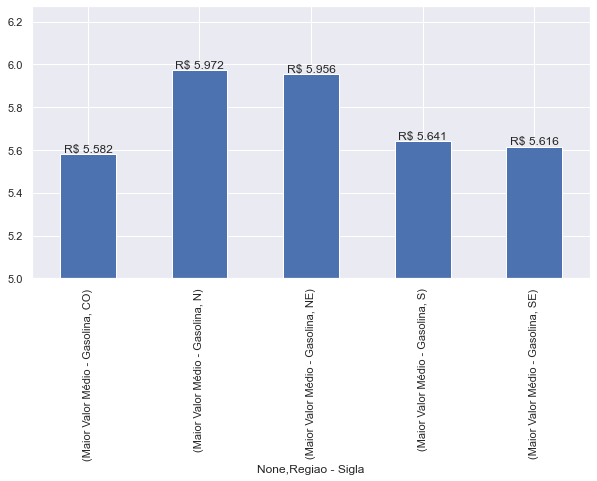

In [334]:
produtos_gas.unstack(level=0).plot(kind='bar', figsize=(10,5), layout=(2,3), ylim=5.0)

for index, values in enumerate(produtos_gas['Maior Valor Médio - Gasolina'].values):
    plt.text(index, values, str(f'R$ {values:.3f}'), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.show()

In [335]:
# Criando uma cópia do DF original onde temos apenas os registros da Gasolina Aditivada
df_gas_adi = conjunto_dados.query('Produto == "Gasolina Aditivada"').copy()

# Ordenando o novo dataframe com o valor de venda da gasolina aditivada por região
produtos_gas_adi = df_gas_adi.groupby(['Produto', 'Regiao - Sigla'])[['Valor de Venda']].mean()
produtos_gas_adi.columns = ['Maior Valor Médio']

novo = produtos_gas_adi.unstack(level = 0).copy()
novo_gas_adi = novo['Maior Valor Médio']['Gasolina Aditivada']

produtos_gas_adi = pd.DataFrame([novo_gas_adi])
produtos_gas_adi = produtos_gas_adi.T
produtos_gas_adi = produtos_gas_adi.rename(columns={'Gasolina Aditivada':'Maior Valor Médio - Gasolina Aditivada'})

produtos_gas_adi.style.highlight_max(color='#CF0909')

,Maior Valor Médio - Gasolina Aditivada
Regiao - Sigla,
CO,5.721266
N,6.105695
NE,6.109450
S,5.777628
SE,5.827207


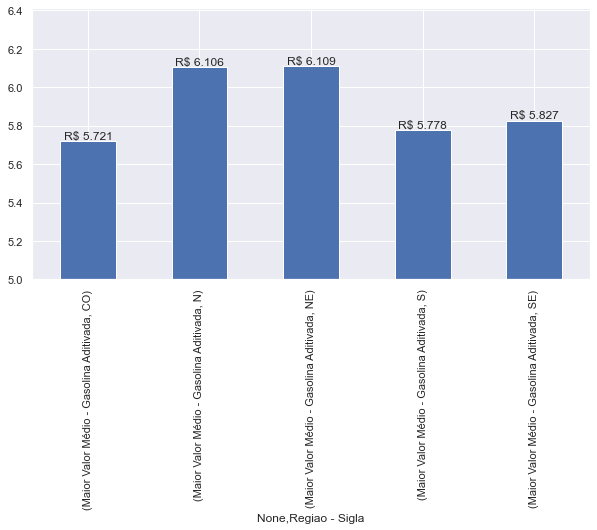

In [336]:
produtos_gas_adi.unstack(level=0).plot(kind='bar', figsize=(10,5), layout=(2,3), ylim=5.0)

for index, values in enumerate(produtos_gas_adi['Maior Valor Médio - Gasolina Aditivada'].values):
    plt.text(index, values, str(f'R$ {values:.3f}'), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.show()

In [337]:
# 8. Qual a região que possui o menor valor médio do etanol?

# Criando uma cópia do DF original onde temos apenas os registros do Etanol
df_etanol = conjunto_dados.query('Produto == "Etanol"').copy()

# Ordenando o novo dataframe com o valor de venda do etanol por região
produtos_etanol = df_etanol.groupby(['Produto', 'Regiao - Sigla'])[['Valor de Venda']].mean()
produtos_etanol.columns = ['Menor Valor Médio']

novo = produtos_etanol.unstack(level = 0).copy()
novo_et = novo['Menor Valor Médio']['Etanol']

produtos_etanol = pd.DataFrame([novo_et])
produtos_etanol = produtos_etanol.T
produtos_etanol = produtos_etanol.rename(columns={'Etanol':'Menor Valor Médio - Etanol'}) 

produtos_etanol.style.highlight_min(color='#0C9E02')

,Menor Valor Médio - Etanol
Regiao - Sigla,
CO,4.107305
N,5.340633
NE,5.246069
S,4.842372
SE,4.149964


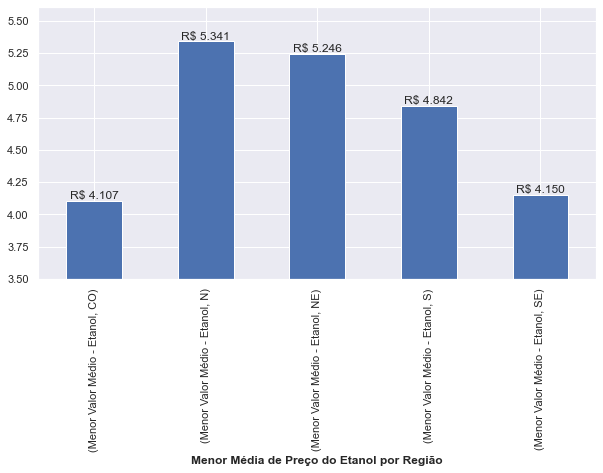

In [358]:
produtos_etanol.unstack(level=0).plot(kind='bar', figsize=(10,5), layout=(2,3), ylim=3.5)

for index, values in enumerate(produtos_etanol['Menor Valor Médio - Etanol'].values):
    plt.text(index, values, str(f'R$ {values:.3f}'), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
    
plt.xlabel('Menor Média de Preço do Etanol por Região', fontweight ='bold')
plt.show()

In [ ]:
#9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
#   Há uma correlação positiva muito forte entre os valores do combustível com base na média por região.

In [339]:
media_combs_regiao = conjunto_dados.groupby(['Regiao - Sigla','Produto'])[['Valor de Venda']].mean()
media_combs_regiao.columns = ['Preço Médio']

novo = media_combs_regiao.unstack().copy()
novo_etanol = novo['Preço Médio']['Etanol']
novo_gas = novo['Preço Médio']['Gasolina']
novo_gasadt = novo['Preço Médio']['Gasolina Aditivada']

novo_df = pd.DataFrame(data = [novo_etanol,novo_gas,novo_gasadt])
nova_media_combs_regiao = novo_df.swapaxes('index','columns')

display(nova_media_combs_regiao)

,Etanol,Gasolina,Gasolina Aditivada
Regiao - Sigla,,,
CO,4.107305,5.581603,5.721266
N,5.340633,5.972082,6.105695
NE,5.246069,5.955809,6.109450
S,4.842372,5.641161,5.777628
SE,4.149964,5.615655,5.827207


In [340]:
media_regiao_2 = media_combs_regiao.unstack('Regiao - Sigla', 'Produto')

nova_media_rg2 = media_regiao_2['Preço Médio'].copy().T
nova_media_rg2.columns.name = ''
nova_media_rg2

,Etanol,Gasolina,Gasolina Aditivada
Regiao - Sigla,,,
CO,4.107305,5.581603,5.721266
N,5.340633,5.972082,6.105695
NE,5.246069,5.955809,6.109450
S,4.842372,5.641161,5.777628
SE,4.149964,5.615655,5.827207


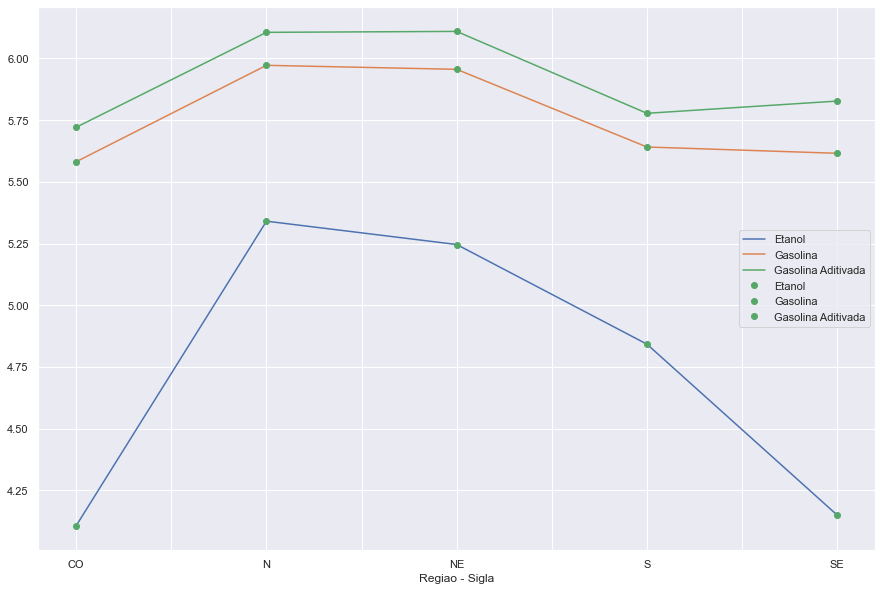

In [341]:
ax = nova_media_rg2.plot()
nova_media_rg2.plot(marker = 'o', linestyle = 'none', color = 'g', ax = ax, figsize=(15,10));

In [342]:
# 10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

In [343]:
media_combs_bandeira = conjunto_dados.groupby(['Bandeira', 'Produto'])[['Valor de Venda']].mean()
media_combs_bandeira

Valor de Venda
Bandeira    Produto                           
Alesat      Etanol                    4.657715
            Gasolina                  5.798276
            Gasolina Aditivada        5.925192
Americanoil Etanol                    5.190000
            Gasolina                  5.847826
...                                        ...
Walendowsky Gasolina                  5.852222
            Gasolina Aditivada        5.862222
Watt        Etanol                    4.104545
            Gasolina                  6.027273
            Gasolina Aditivada        6.960000

[145 rows x 1 columns]

In [344]:
media_bandeira_1 = media_combs_bandeira.unstack()
media_bandeira_1.head()

Valor de Venda                             
Produto             Etanol  Gasolina Gasolina Aditivada
Bandeira                                               
Alesat            4.657715  5.798276           5.925192
Americanoil       5.190000  5.847826           5.915333
Atem' S           5.158268  5.974562           5.916859
Atlântica         4.942308  5.791750           5.837419
Branca            4.373859  5.645761           5.762779

In [345]:
media_bandeira_1.reset_index(inplace=True)
media_bandeira_1.head()

Bandeira Valor de Venda                             
Produto                      Etanol  Gasolina Gasolina Aditivada
0             Alesat       4.657715  5.798276           5.925192
1        Americanoil       5.190000  5.847826           5.915333
2            Atem' S       5.158268  5.974562           5.916859
3          Atlântica       4.942308  5.791750           5.837419
4             Branca       4.373859  5.645761           5.762779

In [346]:
# Criando um groupby dos registros da SUL COMBUSTÍVEIS e mostrando o df
bandeira_sul_comb = conjunto_dados.loc[(conjunto_dados['Bandeira'] == 'Sul Combustíveis'), :].copy()
bandeira_sul_comb.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira,Dias da Semana
4801,S,RS,Sao Gabriel,Jp Santa Lucia Comercio De Combustiveis Ltda,17.695.813/0019-75,Rua Mario Avancini Dos Santos,34,0,Gabrielense,97306-002,Gasolina Aditivada,2022-07-04,7.14,R$ / litro,Sul Combustíveis,Segunda
4802,S,RS,Sao Gabriel,Jp Santa Lucia Comercio De Combustiveis Ltda,17.695.813/0019-75,Rua Mario Avancini Dos Santos,34,0,Gabrielense,97306-002,Gasolina,2022-07-04,6.99,R$ / litro,Sul Combustíveis,Segunda
8313,S,RS,Santa Maria,Treino Comercio De Combustiveis - Eireli,33.517.308/0001-68,Rua Assis Brasil,395,0,Itarare,97045-070,Gasolina Aditivada,2022-07-05,6.49,R$ / litro,Sul Combustíveis,Terça
8314,S,RS,Santa Maria,Treino Comercio De Combustiveis - Eireli,33.517.308/0001-68,Rua Assis Brasil,395,0,Itarare,97045-070,Gasolina,2022-07-05,6.39,R$ / litro,Sul Combustíveis,Terça
18441,S,RS,Santa Maria,Treino Comercio De Combustiveis - Eireli,33.517.308/0001-68,Rua Assis Brasil,395,0,Itarare,97045-070,Gasolina,2022-07-11,5.83,R$ / litro,Sul Combustíveis,Segunda


In [347]:
# Conferindo os valores únicos desses registros e confirmando que a SUL COMBUSTÍVEIS 
bandeira_sul_comb['Produto'].value_counts()

Gasolina Aditivada    20
Gasolina              20
Name: Produto, dtype: int64

In [348]:
# Criando um groupby dos registros da RUFF C.J. e mostrando o df
bandeira_ruff_comb = conjunto_dados.loc[(conjunto_dados['Bandeira'] == 'Ruff C.J.'), :].copy()
bandeira_ruff_comb.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira,Dias da Semana
26062,SE,SP,Sao Joao Da Boa Vista,Comercial De Petroleo 4C Ltda,31.819.835/0001-00,Rua Tiradentes,45,0,Rosario,13870-260,Gasolina,2022-07-13,5.69,R$ / litro,Ruff C.J.,Quarta
26063,SE,SP,Sao Joao Da Boa Vista,Comercial De Petroleo 4C Ltda,31.819.835/0001-00,Rua Tiradentes,45,0,Rosario,13870-260,Etanol,2022-07-13,4.13,R$ / litro,Ruff C.J.,Quarta
40685,SE,SP,Sao Joao Da Boa Vista,Comercial De Petroleo 4C Ltda,31.819.835/0001-00,Rua Tiradentes,45,0,Rosario,13870-260,Etanol,2022-07-20,3.99,R$ / litro,Ruff C.J.,Quarta
40686,SE,SP,Sao Joao Da Boa Vista,Comercial De Petroleo 4C Ltda,31.819.835/0001-00,Rua Tiradentes,45,0,Rosario,13870-260,Gasolina,2022-07-20,5.69,R$ / litro,Ruff C.J.,Quarta
51314,SE,SP,Sao Joao Da Boa Vista,Comercial De Petroleo 4C Ltda,31.819.835/0001-00,Rua Tiradentes,45,0,Rosario,13870-260,Etanol,2022-07-26,3.99,R$ / litro,Ruff C.J.,Terça


In [349]:
bandeira_ruff_comb['Produto'].value_counts()

Gasolina    6
Etanol      6
Name: Produto, dtype: int64

In [350]:
media_bandeira_1['Bandeira'] = media_bandeira_1['Bandeira'].astype('category').cat.codes
media_bandeira_1.corr()

Bandeira Valor de Venda            \
Produto                                             Etanol  Gasolina   
               Produto                                                 
Bandeira                           1.000000      -0.186898 -0.162000   
Valor de Venda Etanol             -0.186898       1.000000  0.501727   
               Gasolina           -0.162000       0.501727  1.000000   
               Gasolina Aditivada  0.027486       0.261135  0.840504   

                                                      
Produto                           Gasolina Aditivada  
               Produto                                
Bandeira                                    0.027486  
Valor de Venda Etanol                       0.261135  
               Gasolina                     0.840504  
               Gasolina Aditivada           1.000000

In [351]:
# IDEIAS

# - Pegar as principais bandeiras (que vende todos os combs e esta presente em todas regioes) e plotar
#   um gráfico de barras

In [352]:
# EXTRA 1: Qual dia da semana possui o valor dos combustíveis mais caros?

# Inicialmente fizemos um dataframe agrupando a média do valor de venda por dias da semana. Foi verificado que os dados estão contidos em dias úteis.
venda_semana = conjunto_dados.groupby(['Dias da Semana'])[['Valor de Venda']].mean()

# Classificamos pelo Valor de venda para o maior número
venda_semana.sort_values('Valor de Venda', inplace=True, ascending=False)

# Estilizamos para o formato de 3 números após a vírgula
vendasemana.style.format(' R$ {:,.3f}').background_gradient(cmap='Reds')

# Sextas possuem valores mais caros em todos os combustíveis.
# offtopic: Podemos colocar como gráfico de barras também
#sns.barplot(x=vendasemana.index,y='Valor de Venda',data = vendasemana)


,Valor de Venda
Dias da Semana,
Sexta,R$ 5.444
Segunda,R$ 5.394
Terça,R$ 5.393
Quarta,R$ 5.307
Quinta,R$ 5.293


In [353]:
# Ainda o EXTRA 1

# Para os combustiveis separadamente
venda_produto_semana = conjunto_dados.groupby(['Dias da Semana', 'Produto'])[['Valor de Venda']].mean()
venda_produto_semana.columns = ['Média']

#vendaprodutosemana.sort_values('Média',inplace=True,ascending=False)
venda_produto_semana.style.format(' R$ {:,.3f}').background_gradient(cmap='Reds')

# Gasolina aditivada na sexta é o valor mais caro.